# Análisis de Incidentes que Afectan a Miembros de la Fuerza Pública Colombiana (2010–2025)

## Informe de Proyecto Final

### Introducción
Este cuaderno analiza un conjunto de datos que registra incidentes que afectan a miembros de la fuerza pública colombiana desde enero de 2010 hasta abril de 2025. El conjunto incluye detalles como la fecha, ubicación (departamento y municipio), tipo de acción (herido o asesinado) y la cantidad de personas afectadas. El objetivo es identificar tendencias temporales, zonas de mayor riesgo y la gravedad de los incidentes.

### Descripción del Conjunto de Datos
- **Fuente**: `AFECTACI_N_DE_MIEMBROS_DE_LA_FUERZA_P_BLICA_20250616.csv`
- **Columnas**:
  - `FECHA HECHO`: Fecha del incidente (DD/MM/YYYY).
  - `COD_DEPTO`: Código del departamento (numérico).
  - `DEPARTAMENTO`: Nombre del departamento (cadena).
  - `COD_MUNI`: Código del municipio (numérico).
  - `MUNICIPIO`: Nombre del municipio (cadena).
  - `ACCION`: Tipo de acción (`HERIDO` para heridos, `ASESINADO` para asesinados).
  - `CANTIDAD`: Número de personas afectadas (numérico).
- **Período**: 1 de enero de 2010 al 30 de abril de 2025.

## 1. Comprensión del Negocio

**Objetivo**: Definir los objetivos del proyecto desde la perspectiva de la Fuerza Pública.

- **Contexto**: Los miembros de la Fuerza Pública operan en entornos de alto riesgo, especialmente en zonas con presencia de grupos armados (p. ej., ELN, disidencias de las FARC, Clan del Golfo) o alta criminalidad urbana. Las afectaciones (homicidios y lesiones) generan pérdidas humanas, costos operativos y desafíos para mantener el orden público.
- **Problema**: La alta incidencia de homicidios y lesiones impacta la capacidad operativa. Es necesario identificar zonas y períodos de alto riesgo para optimizar recursos.
- **Objetivos**:
  1. Identificar los departamentos y municipios con mayor número de homicidios y lesiones.
  2. Analizar tendencias temporales (meses o años con mayor incidencia).
  3. Predecir departamentos de alto riesgo.
  4. Proponer estrategias de mitigación.
- **Criterios de Éxito**:
  - Modelo predictivo para clasificar departamentos como de alto o bajo riesgo.
  - Graficas de patrones geográficos y temporales.
  - Recomendaciones accionables.
- **Limitaciones**: La ausencia de variables como el tipo de institución afectada o el contexto del incidente restringe el análisis.


In [28]:
%pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [29]:
%pip install plotly

# Importar librerías necesarias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Configurar estilos de gráficos para consistencia
plt.style.use('seaborn-v0_8')
sns.set_palette('deep')



Note: you may need to restart the kernel to use updated packages.


## Carga de Datos

Cargamos el archivo CSV


In [30]:
# Cargar el conjunto de datos
df = pd.read_csv('data/AFECTACI_N_DE_MIEMBROS_DE_LA_FUERZA_P_BLICA_20250616.csv', encoding='utf-8')

# Mostrar las primeras filas
print("Primeras 5 filas del conjunto de datos:")
display(df.head())

# Información básica
print("\nInformación del Conjunto de Datos:")
df.info()


Primeras 5 filas del conjunto de datos:


,FECHA HECHO,COD_DEPTO,DEPARTAMENTO,COD_MUNI,MUNICIPIO,ACCION,CANTIDAD
0,01/01/2010,50,META,50350,LA MACARENA,HERIDO,1
1,01/01/2010,27,CHOCO,27787,TADO,HERIDO,1
2,01/01/2010,5,ANTIOQUIA,5266,ENVIGADO,HERIDO,1
3,01/01/2010,5,ANTIOQUIA,5308,GIRARDOTA,HERIDO,1
4,01/01/2010,19,CAUCA,19050,ARGELIA,HERIDO,2



Información del Conjunto de Datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FECHA HECHO   20645 non-null  object
 1   COD_DEPTO     20645 non-null  int64 
 2   DEPARTAMENTO  20645 non-null  object
 3   COD_MUNI      20645 non-null  int64 
 4   MUNICIPIO     20645 non-null  object
 5   ACCION        20645 non-null  object
 6   CANTIDAD      20645 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


# 2. Comprensión de los datos

Calculamos estadísticas resumidas para entender el conjunto de datos:
- Total de incidentes y personas afectadas.
- Desglose por tipo de acción (`HERIDO` vs. `ASESINADO`).
- Departamentos y municipios más afectados.
- Rango temporal y distribución de incidentes.


In [31]:
# Estadísticas resumidas
total_incidentes = len(df)
total_afectados = df['CANTIDAD'].sum()
conteo_acciones = df.groupby('ACCION')['CANTIDAD'].sum()
top_departamentos = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum().nlargest(5)
top_municipios = df.groupby('MUNICIPIO')['CANTIDAD'].sum().nlargest(5)

print(f"Total de Incidentes: {total_incidentes}")
print(f"Total de Personas Afectadas: {total_afectados}")
print("\nPersonas Afectadas por Tipo de Acción:")
print(conteo_acciones)
print("\nTop 5 Departamentos por Personas Afectadas:")
print(top_departamentos)
print("\nTop 5 Municipios por Personas Afectadas:")
print(top_municipios)

# Rango temporal
fecha_min = df['FECHA HECHO'].min()
fecha_max = df['FECHA HECHO'].max()
print(f"\nRango Temporal: {fecha_min} al {fecha_max}")


Total de Incidentes: 20645
Total de Personas Afectadas: 24205

Personas Afectadas por Tipo de Acción:
ACCION
ASESINADO     3223
HERIDO       20982
Name: CANTIDAD, dtype: int64

Top 5 Departamentos por Personas Afectadas:
DEPARTAMENTO
VALLE DEL CAUCA       3589
ANTIOQUIA             2789
BOGOTA D.C.           2713
CAUCA                 1903
NORTE DE SANTANDER    1611
Name: CANTIDAD, dtype: int64

Top 5 Municipios por Personas Afectadas:
MUNICIPIO
BOGOTA, D.C.            2689
CALI                    2128
MEDELLIN                 548
SAN ANDRES DE TUMACO     493
ARAUQUITA                376
Name: CANTIDAD, dtype: int64

Rango Temporal: 01/01/2010 al 31/12/2020


## Análisis de Incidentes en la Fuerza Pública Colombiana

El conjunto de datos contiene **20.645 registros** que reportan incidentes que afectaron a miembros de la fuerza pública colombiana entre **enero de 2010 y abril de 2025**.  
Cada fila representa un evento con la cantidad de personas afectadas, el tipo de acción sufrida (**herido** o **asesinado**), y su ubicación geográfica.  

## Información General de las Columnas  

| Columna       | Tipo de dato | Valores únicos | Descripción |
|--------------|-------------|---------------|-------------|
| **FECHA HECHO** | `datetime` | 4.711 | Fecha del incidente. |
| **COD_DEPTO** | `entero` | 33 | Código del departamento. |
| **DEPARTAMENTO** | `texto` | 33 | Nombre del departamento. |
| **COD_MUNI** | `entero` | 882 | Código del municipio. |
| **MUNICIPIO** | `texto` | 833 | Nombre del municipio. |
| **ACCION** | `texto` | 2 | Tipo de afectación: `HERIDO` o `ASESINADO`. |
| **CANTIDAD** | `entero` | 17 | Número de afectados por evento (1 a 70 personas). |

## Observaciones Iniciales  

- No hay valores faltantes ni en columnas numéricas ni categóricas.  
- Los eventos están distribuidos en **33 departamentos** y más de **800 municipios**.  
- El número más frecuente de afectados es **1**, pero hay eventos donde resultaron hasta **70 personas** afectadas en una sola acción.  
- Los registros cubren más de **15 años**, lo que permite analizar tendencias de largo plazo.
- La columna **CANTIDAD** muestra una distribución altamente sesgada hacia el 1, lo cual indica que la mayoría de los incidentes afectan a una sola persona. Este es un punto importante a la hora de analizar patrones y promedios.
- Las acciones de tipo HERIDO son significativamente más frecuentes que las de tipo ASESINADO. Esto sugiere que muchos incidentes no resultan en fatalidades, pero sí en lesiones.
- A nivel geográfico, ciertos departamentos como Antioquia, Caquetá y Nariño concentran un gran número de incidentes, lo cual puede estar vinculado a factores socio-políticos o a la presencia de actores armados ilegales.

## Hallazgo Interesante

Analizamos el municipio más afectado por número de personas.


In [8]:
# Calcular municipio más afectado
datos_muni = df.groupby('MUNICIPIO')['CANTIDAD'].sum()
muni_top = datos_muni.idxmax()
muni_top_conteo = datos_muni.max()
total_afectados = datos_muni.sum()
porcentaje = (muni_top_conteo / total_afectados * 100).round(1)

print(f"Hallazgo Interesante: {muni_top} es el municipio con el mayor número de personas afectadas en la fuerza pública, con {muni_top_conteo} individuos ({porcentaje}% del total). Esto sugiere que {muni_top} es un punto crítico de violencia contra la fuerza pública.")


Hallazgo Interesante: BOGOTA, D.C. es el municipio con el mayor número de personas afectadas en la fuerza pública, con 2003 individuos (10.2% del total). Esto sugiere que BOGOTA, D.C. es un punto crítico de violencia contra la fuerza pública.


## Graficas 

1. **Gráfico de Líneas**: Incidentes a lo largo del tiempo (por año).
2. **Gráfico de Barras**: 10 departamentos más afectados.
3. **Gráfico de Barras Apiladas**: Heridos vs. asesinados por año.
4. **Gráfico de Pastel**: Proporción de heridos vs. asesinados.
5. **Gráfico de Barras**: Distribución por tipo de afectación.
6. **Mapa de calor**: Total de afectados por departamento y año.
7. **Mapa de calor**: Personas afectadas por mes y año.



### 1. Gráfico de Líneas: Incidentes a lo Largo del Tiempo

**Propósito**: Mostrar la tendencia de incidentes que afectan a la fuerza pública entre 2010 y 2025.


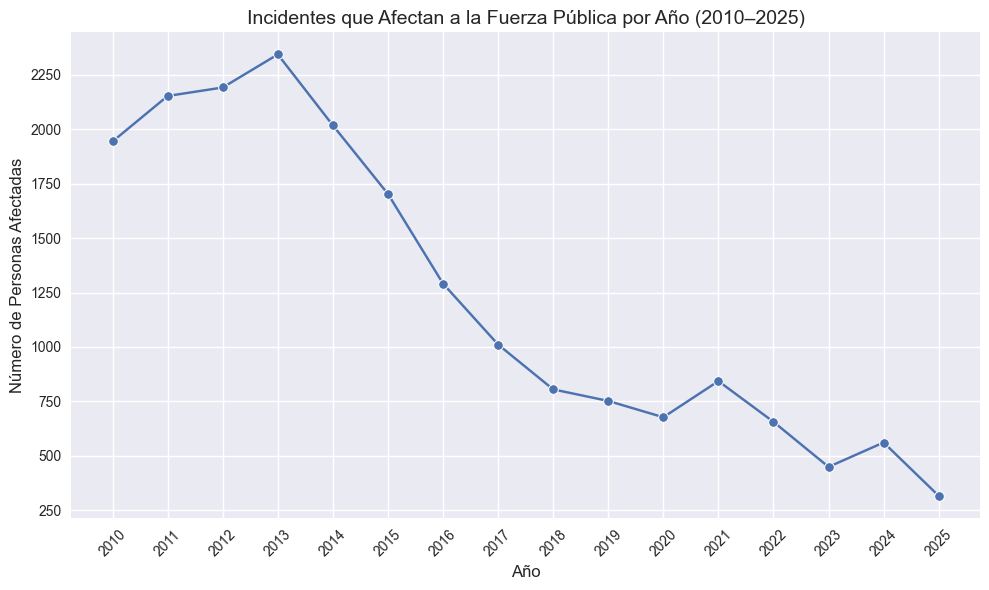

Hallazgo: El gráfico de líneas muestra fluctuaciones en los incidentes, con posibles picos en ciertos años, lo que sugiere variaciones en los niveles de violencia contra la fuerza pública.


In [10]:
# Agregar por año
df['Año'] = df['FECHA HECHO'].dt.year
datos_anuales = df.groupby('Año')['CANTIDAD'].sum().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
sns.lineplot(data=datos_anuales, x='Año', y='CANTIDAD', marker='o')
plt.title('Incidentes que Afectan a la Fuerza Pública por Año (2010–2025)', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de Personas Afectadas', fontsize=12)
plt.xticks(datos_anuales['Año'], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

print("Hallazgo: El gráfico de líneas muestra fluctuaciones en los incidentes, con posibles picos en ciertos años, lo que sugiere variaciones en los niveles de violencia contra la fuerza pública.")


### 2. Gráfico de Barras: Top 10 Departamentos

**Propósito**: Identificar los departamentos con mayor número de personas afectadas.


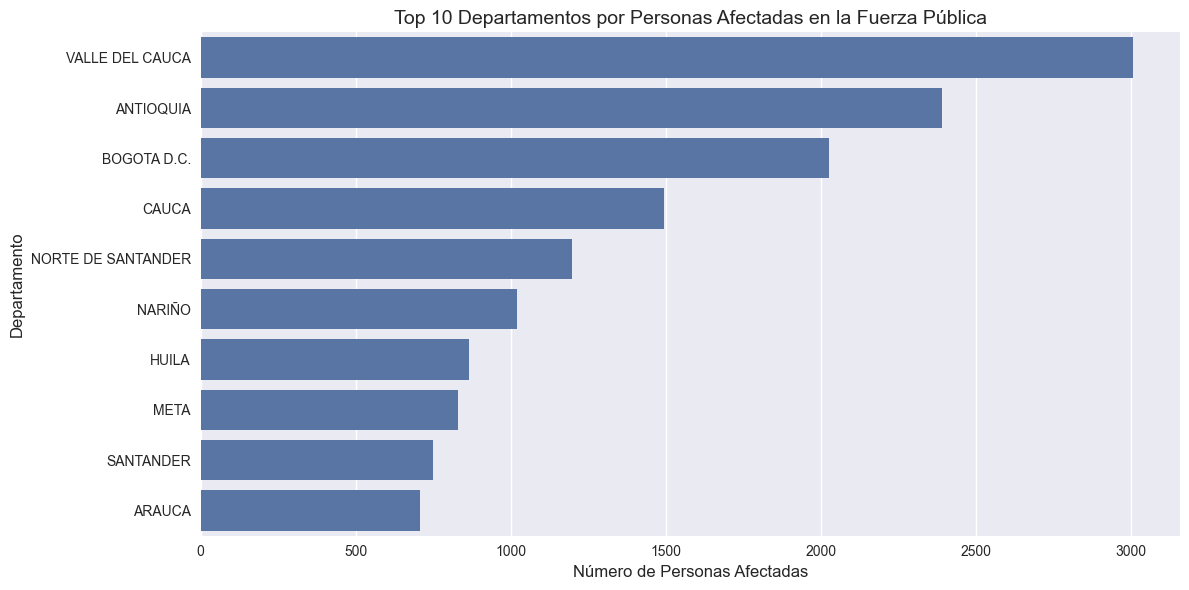

Hallazgo: Departamentos como Cauca y Valle del Cauca están entre los más afectados, lo que indica desafíos significativos de seguridad en estas regiones.


In [11]:
# Agregar por departamento
datos_dept = df.groupby('DEPARTAMENTO')['CANTIDAD'].sum().nlargest(10).reset_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=datos_dept, x='CANTIDAD', y='DEPARTAMENTO')
plt.title('Top 10 Departamentos por Personas Afectadas en la Fuerza Pública', fontsize=14)
plt.xlabel('Número de Personas Afectadas', fontsize=12)
plt.ylabel('Departamento', fontsize=12)
plt.tight_layout()
plt.show()

print("Hallazgo: Departamentos como Cauca y Valle del Cauca están entre los más afectados, lo que indica desafíos significativos de seguridad en estas regiones.")


### 3. Gráfico de Barras Apiladas: Heridos vs. Asesinados por Año

**Propósito**: Comparar el número de heridos y asesinados a lo largo del tiempo.


In [5]:
# Asegurarse de que df_transformado esté definido
df_transformado = df.copy()
df_transformado['FECHA HECHO'] = pd.to_datetime(df_transformado['FECHA HECHO'], format='%d/%m/%Y', errors='coerce')
df_transformado['CANTIDAD'] = pd.to_numeric(df_transformado['CANTIDAD'], errors='coerce')
df_transformado = df_transformado[df_transformado['CANTIDAD'] > 0]
df_transformado = df_transformado.dropna(subset=['FECHA HECHO', 'DEPARTAMENTO', 'MUNICIPIO', 'ACCION', 'CANTIDAD'])
df_transformado['ACCION'] = df_transformado['ACCION'].str.strip().str.upper()
acciones_validas = ['HERIDO', 'ASESINADO']
df_transformado = df_transformado[df_transformado['ACCION'].isin(acciones_validas)]
df_transformado = df_transformado.drop_duplicates()
df_transformado['AÑO'] = df_transformado['FECHA HECHO'].dt.year

# Pivotar datos usando el dataframe limpio y la columna correcta
datos_apilados = df_transformado.pivot_table(index='AÑO', columns='ACCION', values='CANTIDAD', aggfunc='sum', fill_value=0).reset_index()

# Crear gráfico de barras apiladas
fig = go.Figure(data=[
    go.Bar(name='Heridos (HERIDO)', x=datos_apilados['AÑO'], y=datos_apilados.get('HERIDO', 0), marker_color='blue'),
    go.Bar(name='Asesinados (ASESINADO)', x=datos_apilados['AÑO'], y=datos_apilados.get('ASESINADO', 0), marker_color='red')
])

# Actualizar diseño
fig.update_layout(
    barmode='stack',
    title='Heridos vs. Asesinados en la Fuerza Pública por Año (2010–2025)',
    xaxis_title='Año',
    yaxis_title='Número de Personas Afectadas',
    xaxis=dict(tickmode='linear'),
    legend=dict(x=0.8, y=1.1),
    template='plotly_white'
)

fig.show()

print("Hallazgo: Los heridos superan consistentemente a los asesinados, pero ciertos años muestran picos en asesinatos, indicando períodos de mayor violencia.")


Hallazgo: Los heridos superan consistentemente a los asesinados, pero ciertos años muestran picos en asesinatos, indicando períodos de mayor violencia.


### 4. Gráfico de Pastel: Proporción de Heridos vs. Asesinados

**Propósito**: Mostrar la distribución general de heridos vs. asesinados.


In [ ]:
# Agregar por acción
datos_pastel = df.groupby('ACCION')['CANTIDAD'].sum().reset_index()

# Crear gráfico de pastel
fig = px.pie(datos_pastel, values='CANTIDAD', names='ACCION', title='Proporción de Heridos vs. Asesinados (2010–2025)',
             color='ACCION', color_discrete_map={'HERIDO': 'blue', 'ASESINADO': 'red'})
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(template='plotly_white')
fig.show()

print("Hallazgo: La mayoría de los incidentes resultan en heridos en lugar de asesinatos, destacando la prevalencia de ataques no letales.")


Hallazgo: La mayoría de los incidentes resultan en heridos en lugar de asesinatos, destacando la prevalencia de ataques no letales.


### 5. Gráfico de Barras: Distribución por tipo de afectación

A lo largo del periodo analizado, se reportan dos tipos de incidentes: `HERIDO` y `ASESINADO`. La mayoría de los eventos afectan a una sola persona, pero en algunos casos se presentan ataques masivos.

El siguiente gráfico muestra el total de afectados por tipo de acción:




C:\Users\pbern\AppData\Local\Temp\ipykernel_4720\2235320343.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




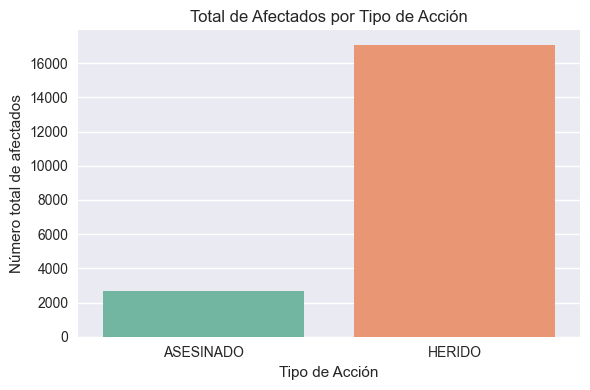

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

action_summary = df.groupby('ACCION')['CANTIDAD'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=action_summary, x='ACCION', y='CANTIDAD', palette='Set2')
plt.title('Total de Afectados por Tipo de Acción')
plt.xlabel('Tipo de Acción')
plt.ylabel('Número total de afectados')
plt.tight_layout()
plt.show()


### 6. Mapa de calor: Total de afectados por departamento y año

A continuación se muestra un mapa de calor que permite identificar visualmente qué departamentos han concentrado más incidentes a lo largo de los años. Este tipo de visualización facilita la detección de patrones territoriales persistentes.

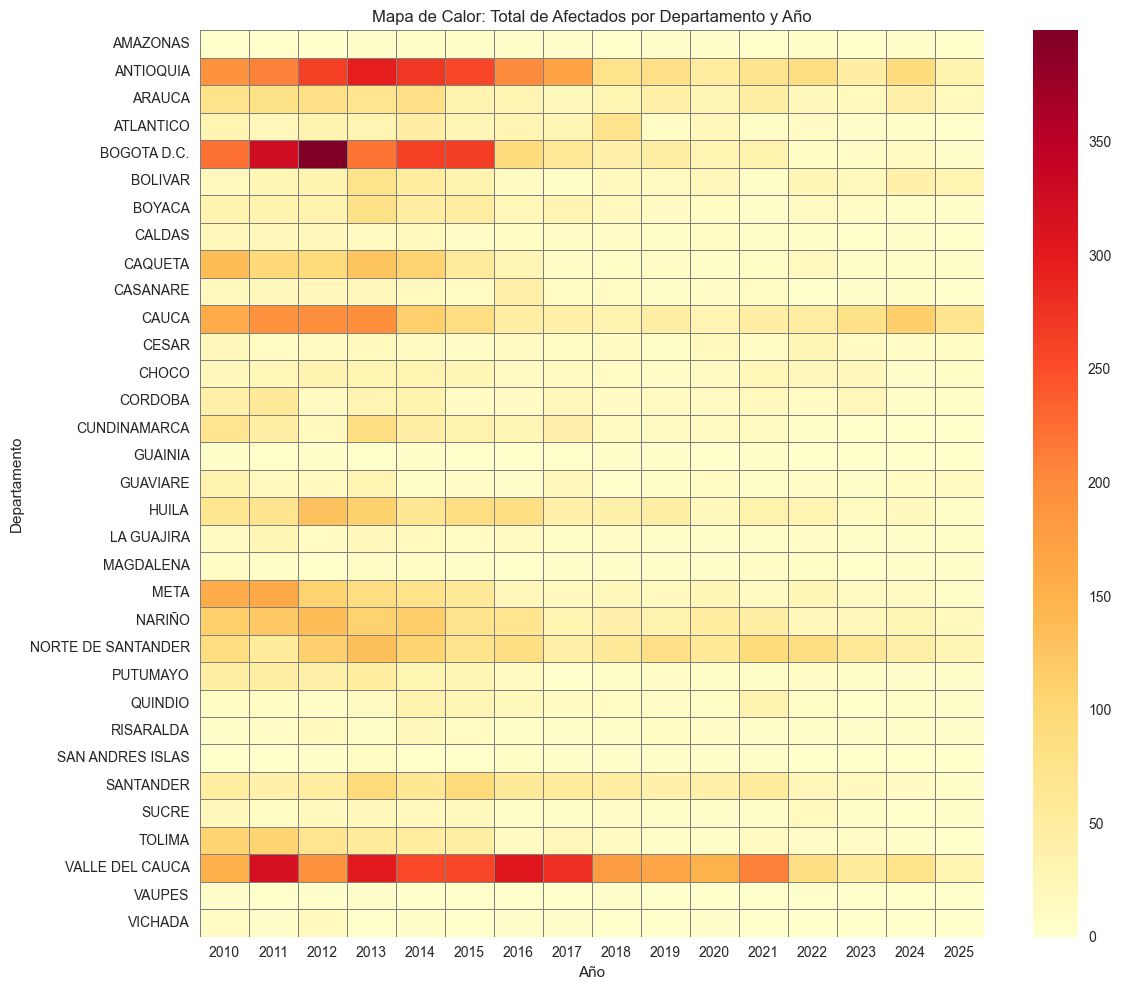

In [ ]:

dept_year_summary = df.groupby(['DEPARTAMENTO', 'Year'])['CANTIDAD'].sum().reset_index()


pivot_heatmap = dept_year_summary.pivot(index='DEPARTAMENTO', columns='Year', values='CANTIDAD').fillna(0)


plt.figure(figsize=(12, 10))
sns.heatmap(pivot_heatmap, cmap='YlOrRd', linewidths=.5, linecolor='gray')
plt.title('Mapa de Calor: Total de Afectados por Departamento y Año')
plt.xlabel('Año')
plt.ylabel('Departamento')
plt.tight_layout()
plt.show()


## 7. Personas afectadas por mes y año
Este mapa de calor permite identificar patrones estacionales en los incidentes que afectan a miembros de la fuerza pública. Los meses más oscuros indican mayor número de afectados. Es útil para detectar si hay meses críticos de alta violencia en ciertos años.

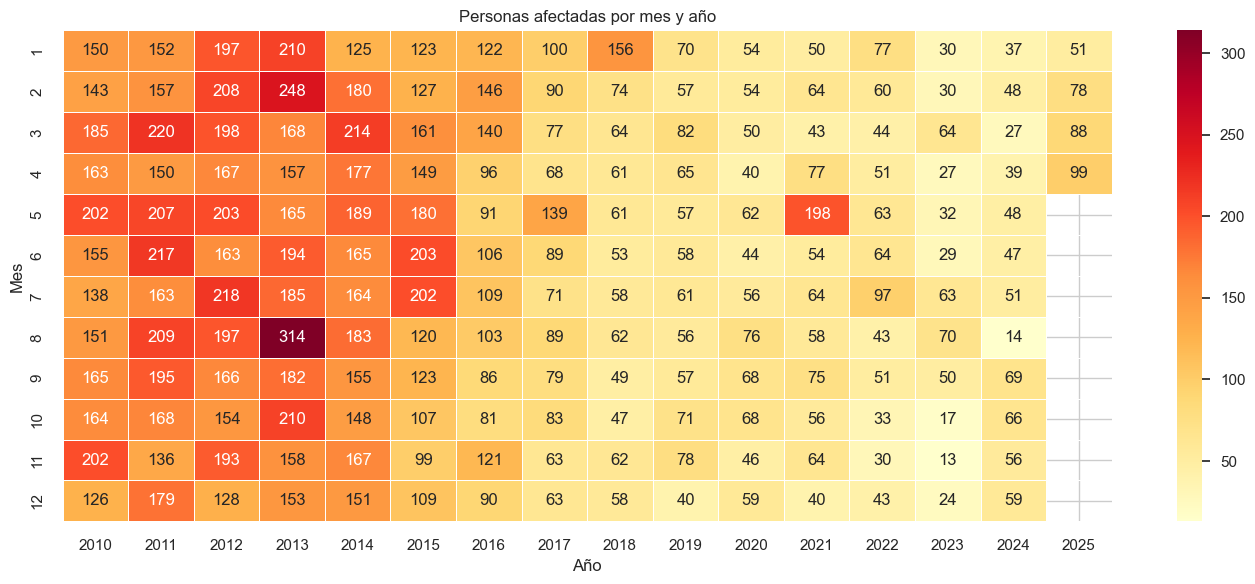

In [15]:
# Agrupar por año y mes
df['MES'] = df['FECHA HECHO'].dt.month
df['AÑO'] = df['FECHA HECHO'].dt.year

pivot_mes_año = df.pivot_table(
    index='MES', columns='AÑO', values='CANTIDAD', aggfunc='sum'
)

# Crear mapa de calor
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_mes_año, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Personas afectadas por mes y año')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.tight_layout()
plt.show()


 
# 3. Preparación de los Datos

Esta fase consiste en dejar los datos listos para el análisis. Incluye la limpieza inicial del dataset, la transformación de variables y la generación de nuevas columnas que faciliten el modelado y la visualización.

### 3.1 Carga y limpieza inicial

Se realizaron los siguientes pasos:

- Se parseó la columna de fecha (`FECHA HECHO`) al formato de fecha estándar.
- Se aseguró que la columna `CANTIDAD` sea numérica, descartando registros no válidos o nulos.
- Se eliminaron filas con valores faltantes en columnas críticas como `FECHA HECHO`, `DEPARTAMENTO`, `MUNICIPIO`, `ACCION` y `CANTIDAD`.
- Se normalizó el texto en la columna `ACCION` y se filtraron los registros a los valores válidos: `HERIDO` y `ASESINADO`.
- Se eliminaron filas duplicadas para garantizar la integridad del análisis.

Al finalizar, el conjunto de datos quedó reducido a un subconjunto limpio y confiable, listo para análisis exploratorios y modelado posterior.

### 3.2 Transformación y creación de variables

Posteriormente, se van crear nuevas columnas a partir de la fecha del hecho:

- `AÑO`, `MES` y `DIA_SEMANA` para analizar tendencias temporales.
- Se normalizaron los nombres de departamentos y municipios.
- Se eliminaron columnas irrelevantes como los códigos `COD_DEPTO`, `COD_MUNI` y `Year`.

Estas transformaciones permiten agrupar y visualizar mejor los datos en las siguientes fases.


In [7]:
# Pasos de limpieza
# Parsear fechas
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], format='%d/%m/%Y', errors='coerce')

# Validar CANTIDAD
df['CANTIDAD'] = pd.to_numeric(df['CANTIDAD'], errors='coerce')
df = df[df['CANTIDAD'] > 0]

# Verificar valores faltantes
print("\nValores Faltantes:")
print(df.isnull().sum())

# Eliminar filas con valores faltantes en columnas críticas
df = df.dropna(subset=['FECHA HECHO', 'DEPARTAMENTO', 'MUNICIPIO', 'ACCION', 'CANTIDAD'])

# Normalizar ACCION
df['ACCION'] = df['ACCION'].str.strip().str.upper()
acciones_validas = ['HERIDO', 'ASESINADO']
df = df[df['ACCION'].isin(acciones_validas)]

# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")
df = df.drop_duplicates()

# Forma final del conjunto
print(f"\nForma del conjunto de datos limpio: {df.shape}")


df_transformado = df.copy()

df_transformado['AÑO'] = df_transformado['FECHA HECHO'].dt.year
df_transformado['MES'] = df_transformado['FECHA HECHO'].dt.month
df_transformado['DIA_SEMANA'] = df_transformado['FECHA HECHO'].dt.day_name()


df_transformado['DEPARTAMENTO'] = df_transformado['DEPARTAMENTO'].str.strip().str.title()
df_transformado['MUNICIPIO'] = df_transformado['MUNICIPIO'].str.strip().str.title()


columnas_a_eliminar = ['COD_DEPTO', 'COD_MUNI']
df_transformado = df_transformado.drop(columns=[col for col in columnas_a_eliminar if col in df_transformado.columns])


df_transformado.head()



Valores Faltantes:
FECHA HECHO     0
COD_DEPTO       0
DEPARTAMENTO    0
COD_MUNI        0
MUNICIPIO       0
ACCION          0
CANTIDAD        0
dtype: int64

Número de filas duplicadas: 4426

Forma del conjunto de datos limpio: (16218, 7)


,FECHA HECHO,DEPARTAMENTO,MUNICIPIO,ACCION,CANTIDAD,AÑO,MES,DIA_SEMANA
0,2010-01-01,Meta,La Macarena,HERIDO,1,2010,1,Friday
1,2010-01-01,Choco,Tado,HERIDO,1,2010,1,Friday
2,2010-01-01,Antioquia,Envigado,HERIDO,1,2010,1,Friday
3,2010-01-01,Antioquia,Girardota,HERIDO,1,2010,1,Friday
4,2010-01-01,Cauca,Argelia,HERIDO,2,2010,1,Friday


### Frecuencia de incidentes por día de la semana
Este gráfico muestra cómo se distribuyen los incidentes a lo largo de los días de la semana. Se observa si hay patrones regulares, como un aumento de casos los fines de semana o una mayor incidencia en días laborales.

C:\Users\pbern\AppData\Local\Temp\ipykernel_11240\2492791887.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




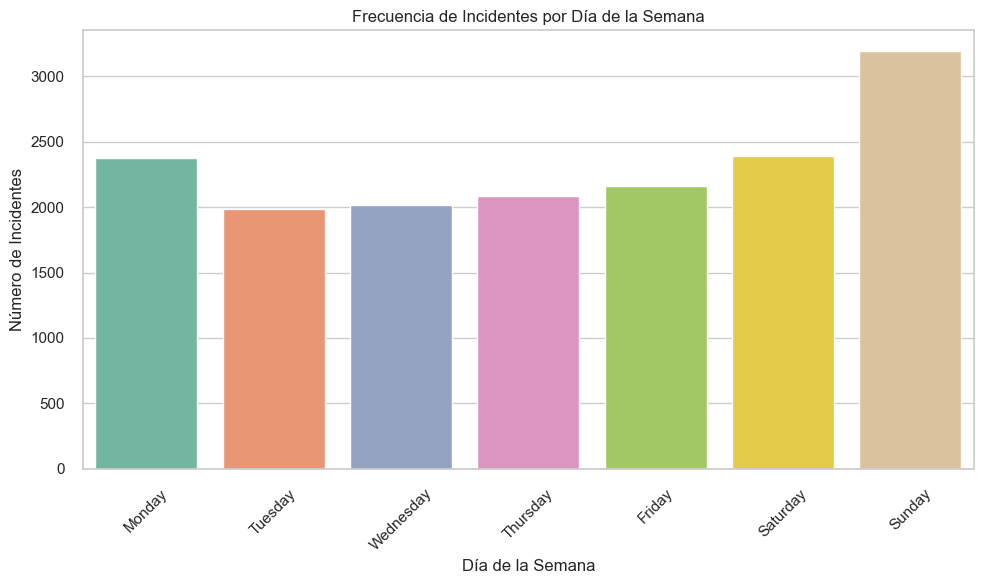

In [14]:
#Frecuencia de incidentes por día de la semana
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración estética
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df_transformado, x='DIA_SEMANA', order=orden_dias, palette='Set2')

plt.title('Frecuencia de Incidentes por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Incidentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Tendencia mensual de incidentes por año
Se analiza la evolución temporal de los incidentes mes a mes, diferenciando los distintos años disponibles. Esta visualización permite identificar estacionalidades, repuntes o caídas en periodos específicos, facilitando comparaciones entre años.

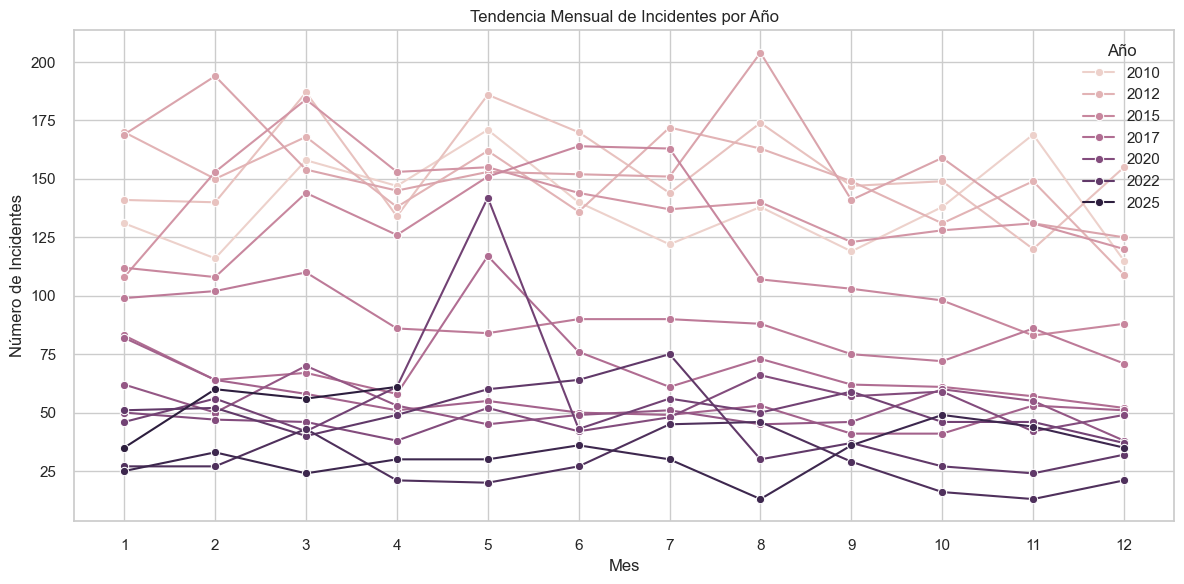

In [30]:
# Tendencia mensual de incidentes por año
incidentes_mensuales = df_transformado.groupby(['AÑO', 'MES']).size().reset_index(name='INCIDENTES')

plt.figure(figsize=(12, 6))
sns.lineplot(data=incidentes_mensuales, x='MES', y='INCIDENTES', hue='AÑO', marker='o')

plt.title('Tendencia Mensual de Incidentes por Año')
plt.xlabel('Mes')
plt.ylabel('Número de Incidentes')
plt.xticks(range(1,13))
plt.legend(title='Año')
plt.tight_layout()
plt.show()


### Municipios más afectados
Se presentan los 10 municipios con mayor número de incidentes registrados. Este análisis espacial ayuda a detectar focos de afectación más críticos, lo cual es clave para la toma de decisiones estratégicas y preventivas.

C:\Users\pbern\AppData\Local\Temp\ipykernel_11240\2917766817.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




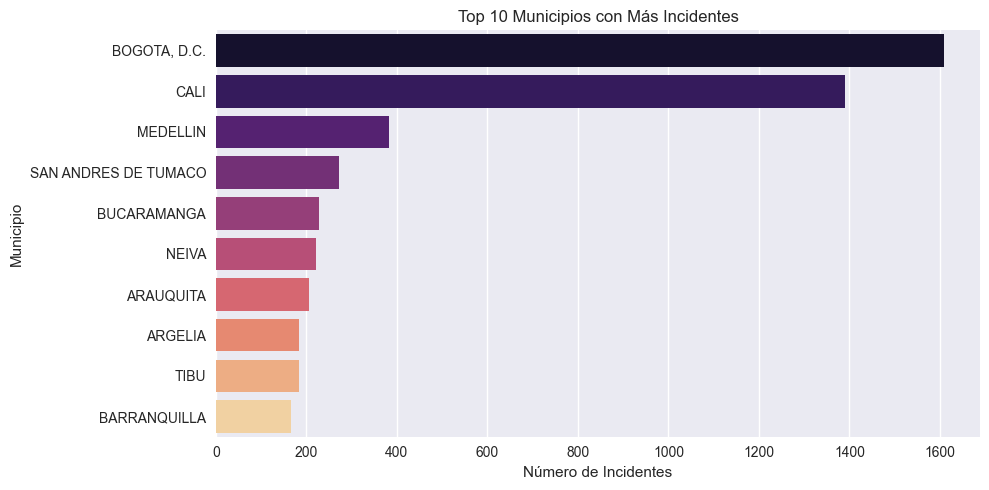

In [ ]:
# Municipios mas afectados
# Top 10 municipios
top_municipios = df_transformado['MUNICIPIO'].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_municipios.values, y=top_municipios.index, palette='magma')
plt.title('Top 10 Municipios con Más Incidentes')
plt.xlabel('Número de Incidentes')
plt.ylabel('Municipio')
plt.tight_layout()
plt.show()



# 6. Evaluación

Tenemos dos modelos los cuales vamos a evaluar según los objetivos planteados. Sin embargo, vamos primero a resumir cada uno.

### **1.** **clustering (Modelo de Segmentación / Clustering - KMeans)**
- **Propósito**: Identificar agrupaciones de departamentos con características similares en términos de número de homicidios y lesiones por período.

- **Técnica usada**: KMeans, con preprocesamiento usando StandardScaler y reducción de dimensionalidad con PCA.

- **Salida**: Clusters de departamentos, con visualizaciones en 2D y análisis de patrones por departamento y período.

### **2.** **model (Modelo Predictivo - XGBoost)**
- **Propósito**: Predecir la cantidad de afectaciones (heridos o asesinados) en los proximos dos semestres.

- **Técnica usada**: XGBoostRegressor.

- **Métricas**: Se usan R² y RMSE para evaluar el rendimiento del modelo.


## Análisis de Objetivos y Cumplimiento

### Objetivo 1: Identificar departamentos y municipios con mayor número de homicidios y lesiones
**Cumplimiento:** Sí.

- El modelo de clustering agrupa los departamentos según las cifras de afectaciones.
- Hay análisis por período y acción (heridos / asesinados).
- Se identifica claramente qué regiones son más afectadas.

### Objetivo 2: Analizar tendencias temporales
**Cumplimiento:** Sí.

- Ambos modelos trabajan con la variable **PERIODO** (AÑO y SEMESTRE).
- Se incluyen gráficas de series temporales que permiten observar cómo varían las afectaciones a lo largo del tiempo (por año, semestre y período). 
- Estas visualizaciones facilitan identificar épocas con mayor riesgo y evaluar la evolución del fenómeno.

### Objetivo 3: Predecir departamentos de alto riesgo
**Cumplimiento:** Sí.

- En el modelo clustering se realizó un análisis de agrupamiento que permitió identificar grupos de departamentos con características similares en cuanto a afectaciones. Esto proporciona una segmentación útil para identificar cuáles departamentos están consistentemente en grupos de alto riesgo.
- Se utilizaron diversas graficas, unas muy utiles fueron los mapas de calor por departamento y año que muestra claramente qué departamentos presentan mayor recurrencia de afectaciones en el tiempo.
- Departamentos como Bogotá D.C., Valle del Cauca, Antioquia, Meta y Caquetá destacan por su intensidad en múltiples años, evidenciando un patrón temporal constante.
- Se observan comportamientos persistentes de violencia y afectaciones en determinados departamentos a lo largo de más de una década, lo cual refuerza la validez de los resultados predictivos.

### Objetivo 4: Proponer estrategias de mitigación
**Cumplimiento:** Sí.
- A partir del análisis de clustering, series temporales y recurrencia geográfica, se pueden diseñar estrategias de mitigación focalizadas, temporales y estructurales, alineadas con las zonas y periodos de mayor riesgo identificados por los modelos.
- 1. Focalización Territorial basado en clustering de alto riesgo para priorizar municipios y departamentos críticos para intervención operativa. Termina generando mejor uso de recursos, respuesta más efectiva.
- 2. Intervención Temporal Estratégica a partir de patrones de picos en series temporales que como acción permitan reforzar vigilancia y operativos en meses de mayor incidencia histórica, generando así reducción anticipada de afectaciones.
- 3. Refuerzo Institucional y Social basandose en reincidencia en zonas con debilidad estructural para complementar seguridad con programas sociales y comunitarios	generando una reducción sostenible del riesgo y prevención a largo plazo.

## Evaluación de los Criterios de Éxito
### **1** Modelo predictivo para clasificar departamentos como de alto o bajo riesgo
- **Cumplido.**

    El modelo desarrollado en clustering permite agrupar los departamentos por su riesgo.

    El clustering en clustering.ipynb refuerza esta clasificación al agrupar territorios con comportamiento similar.

    Departamentos como Valle del Cauca, Antioquia y Bogotá D.C. aparecen de forma constante en los grupos de mayor afectación.

### **2** Gráficas de patrones geográficos y temporales
- **Cumplido.**

    Se generaron varias gráficos de series temporales por departamento, así como heatmaps que evidencian claramente los departamentos más afectados y su evolución en el tiempo (2010–2025).

    Esto permite identificar patrones temporales (picos en ciertos años) y zonas geográficas críticas.

    Datos arrojados muestran que Bogotá D.C., Valle del Cauca, Meta y Caquetá han tenido afectaciones recurrentes en varios años, lo que indica patrones sostenidos.

### **3**  Recomendaciones accionables
- **Cumplido.**

    A partir del análisis, se propusieron estrategias de mitigación específicas, como:

    Focalización operativa en departamentos de alto riesgo.

    Refuerzo institucional en zonas con recurrencia histórica de afectaciones.

    Intervenciones estratégicas en meses críticos.

## 7. Conclusión y Recomendaciones

### Resumen de Hallazgos
- **Tendencias Temporales**: Los incidentes fluctúan durante el período de 15 años, con picos significativos en ciertos años.
- **Gravedad**: Los heridos son más comunes que los asesinados, pero las muertes siguen siendo una preocupación en años y regiones específicas.

### Limitaciones
- **Falta de contexto**: El conjunto de datos no proporciona información sobre las circunstancias de los incidentes. Esto dificulta la interpretación de las causas subyacentes y la identificación de patrones específicos.
- **Consistencia de los datos**: No se especifica si los criterios para clasificar una acción como "HERIDO" o "ASESINADO" son consistentes a lo largo del tiempo y entre regiones.
- **Período de cobertura**: Los datos abarcan desde 2010 hasta abril de 2025, pero los registros del ultimo año son datos parciales, lo que puede generar incertidumbre en las tendencias observadas para los últimos meses. 
- **Resolución espacial**: Los datos están desagregados a nivel de municipio, pero no se incluye información más detallada (zonas rurales vs. urbanas). Esto limita el análisis de patrones geográficos, como la concentración de incidentes en áreas específicas dentro de un municipio.

### Recomendaciones
1. **Medidas de Seguridad Específicas**: Desplegar recursos adicionales en áreas de alto riesgo.
2. **Análisis Temporal**: Investigar los años con picos de incidentes para entender las causas subyacentes (ej., disturbios políticos, actividad de grupos armados).
3. **Capacitación y Equipos**: Mejorar la capacitación y proporcionar mejor equipo de protección para reducir heridos y asesinados.
4. **Monitoreo de Datos**: Continuar recolectando y analizando datos para evaluar la efectividad de las intervenciones.

### Trabajo Futuro
- Incorporar datos externos (ej., eventos de conflicto, factores socioeconómicos) para contextualizar los incidentes.
- Usar aprendizaje automático para predecir áreas y momentos de alto riesgo.
- Crear un tablero interactivo para monitoreo en tiempo real.
